In [4]:
# let the statsmodels library to be consistent with latest pandas
!pip -q install --upgrade statsmodels

# allows us to print multiple outputs from a single Colab cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# load important libraries that we might use
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
import statsmodels.api as sm

from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import r2_score

# Increase viewable area of Pandas tables, numpy arrays, plots
pd.set_option('display.max_rows', 6, 'display.max_columns', 500, 'display.max_colwidth', 1, 'display.precision', 2)
np.set_printoptions(linewidth=10000, precision=4, edgeitems=20, suppress=True)
plt.rcParams['figure.figsize'] = [16, 6]

In [5]:
from google.colab import files
upload = files.upload()

Saving XOM.csv to XOM.csv


In [ ]:
# import yfinance as yf

# symbol = "XOM"

# df_XOM = yf.download(symbol, start="2022-09-15", end="2023-09-14")

# df_XOM.head()

TASK 1

In [6]:
df_XOM = pd.read_csv(open('XOM.csv'))
df_XOM.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-09-15,96.22,96.54,94.05,94.83,91.80,21092300
1,2022-09-16,95.07,95.34,92.00,93.21,90.23,37874700
2,2022-09-19,91.01,93.49,91.00,93.20,90.22,15342100
...,...,...,...,...,...,...,...
7,2022-09-26,84.90,86.22,83.89,83.98,81.30,22043400
8,2022-09-27,85.61,86.96,84.81,85.74,83.00,17307300
9,2022-09-28,86.12,89.30,85.92,88.86,86.02,19543300


TASK 2

In [7]:
# Рассчитываем коэффициент Adj Close/Close
df_XOM['Adj Close/Close'] = df_XOM['Adj Close'] / df_XOM['Close']

# Умножаем все остальные цены на этот коэффициент
df_XOM['Open'] *= df_XOM['Adj Close/Close']
df_XOM['High'] *= df_XOM['Adj Close/Close']
df_XOM['Low'] *= df_XOM['Adj Close/Close']
df_XOM['Close'] *= df_XOM['Adj Close/Close']

# Оставляем только столбцы с новыми adjusted ценами, датой и объемом
df_XOM = df_XOM[['Date', 'Open', 'High', 'Low', 'Close', 'Volume']]
df_XOM.head()

,Date,Open,High,Low,Close,Volume
0,2022-09-15,93.14,93.45,91.04,91.80,21092300
1,2022-09-16,92.03,92.29,89.06,90.23,37874700
2,2022-09-19,88.10,90.50,88.09,90.22,15342100
3,2022-09-20,89.77,89.96,88.71,89.49,14712500
4,2022-09-21,90.58,90.88,87.97,88.04,17332400


TASK 3

<Figure size 1200x600 with 0 Axes>

Text(0.5, 1.0, 'Closing Price Chart')

Text(0.5, 0, 'Date')

Text(0, 0.5, 'Closing Price')

<BarContainer object of 251 artists>

Text(0.5, 1.0, 'Volume Bar Chart')

Text(0.5, 0, 'Date')

Text(0, 0.5, 'Volume')

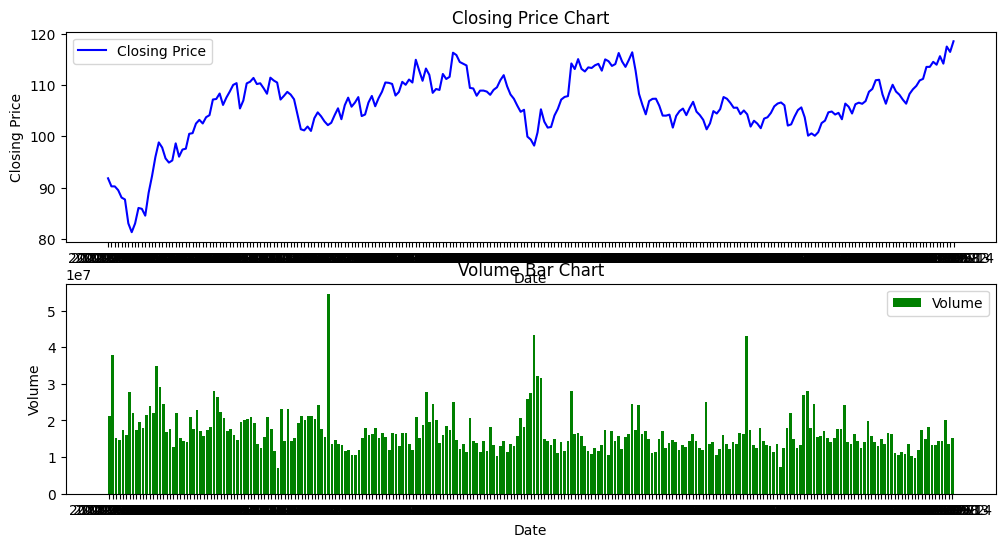

In [8]:
plt.figure(figsize=(12, 6))
ax = plt.subplot(2, 1, 1)
ax2 = plt.subplot(2, 1, 2)

ax.plot(df_XOM['Date'], df_XOM['Close'], label='Closing Price', color='blue')
ax.set_title('Closing Price Chart')
ax.set_xlabel('Date')
ax.set_ylabel('Closing Price')
ax.legend()

ax2.bar(df_XOM['Date'], df_XOM['Volume'], label='Volume', color='green')
ax2.set_title('Volume Bar Chart')
ax2.set_xlabel('Date')
ax2.set_ylabel('Volume')
ax2.legend()


TASK 4

In [9]:
# Checking for missing trading days in the data
all_dates = pd.date_range(start=df_XOM['Date'].min(), end=df_XOM['Date'].max())
missing_dates = all_dates[~all_dates.isin(df_XOM['Date'])]

if len(missing_dates) == 0:
    print("Data for the stock is available for all trading days.")
else:
    print("There are missing trading days in the data:")
    print(missing_dates)


There are missing trading days in the data:
DatetimeIndex(['2022-09-17', '2022-09-18', '2022-09-24', '2022-09-25',
               '2022-10-01', '2022-10-02', '2022-10-08', '2022-10-09',
               '2022-10-15', '2022-10-16',
               ...
               '2023-08-13', '2023-08-19', '2023-08-20', '2023-08-26',
               '2023-08-27', '2023-09-02', '2023-09-03', '2023-09-04',
               '2023-09-09', '2023-09-10'],
              dtype='datetime64[ns]', length=114, freq=None)


In [10]:
# Checking inequalities between prices
incorrect_prices = df_XOM[~((df_XOM['Low'] <= df_XOM['Open']) & (df_XOM['Low'] <= df_XOM['Close']) & (df_XOM['Open'] <= df_XOM['High']) & (df_XOM['Close'] <= df_XOM['High']))]

if incorrect_prices.empty:
    print("Inequalities between prices hold for all data.")
else:
    print("Inequalities between prices are detected for the following days:")
    print(incorrect_prices)


Inequalities between prices hold for all data.


TASK 5

<Figure size 1200x600 with 0 Axes>

Text(0.5, 1.0, 'Closing Price Chart with Moving Averages')

Text(0.5, 0, 'Date')

Text(0, 0.5, 'Closing Price')

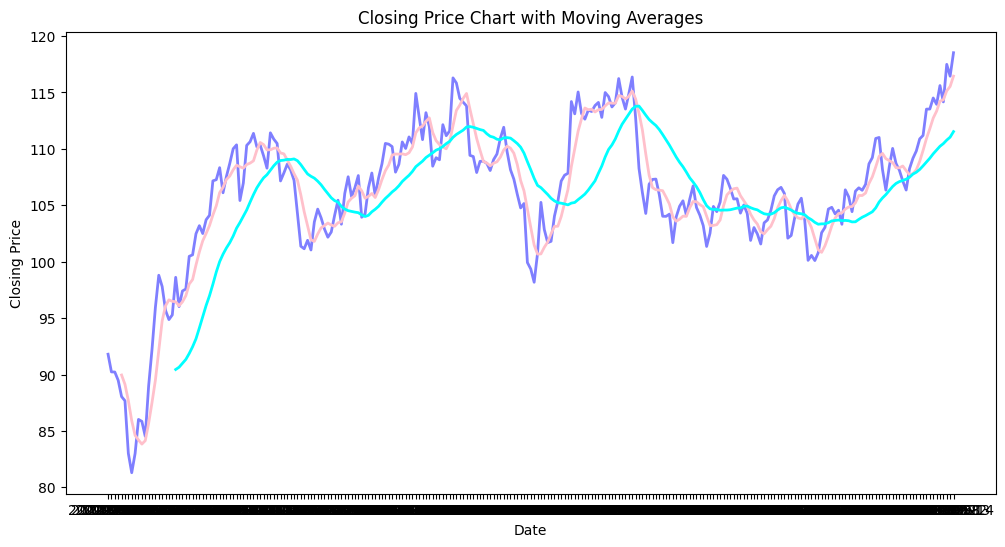

In [11]:
plt.figure(figsize=(12, 6))
ax = plt.subplot(1, 1, 1)

ax.plot(df_XOM['Date'], df_XOM['Close'], label='Closing Price', color='blue', alpha=0.5, linewidth=2)
ax.set_title('Closing Price Chart with Moving Averages')
ax.set_xlabel('Date')
ax.set_ylabel('Closing Price')

n1 = 5
n2 = 21
df_XOM['SMA_5'] = df_XOM['Close'].rolling(window=n1).mean()
df_XOM['SMA_21'] = df_XOM['Close'].rolling(window=n2).mean()

ax.plot(df_XOM['Date'], df_XOM['SMA_5'], label='SMA 5', color='pink', linewidth=2)
ax.plot(df_XOM['Date'], df_XOM['SMA_21'], label='SMA 21', color='cyan', linewidth=2)